# Théme :  La détection des fraudes dans les transactions financiéres ,à l'aide des techniques d'apprentissage automatique .

### Vision globale

Ce deuxiéme Dataset (transactions) est pour la détection de transactions frauduleuses par carte de crédit.

#### Vue initiale aprés avoir examiner ce Dataset :

1. C'est un problème de classification binaire visant à prédire si une transaction est frauduleuse.
2. Données déséquilibrées avec seulement 1,58 % de transactions frauduleuses.
3. Le but :
        ➜ Maximiser  les <span style="color:red">True Positives</span> :pour que le modèle prédit correctement qu'une transaction est    frauduleuse, et en effet, elle l'est. {qui implique :<span style="color:blue"> Minimiser les False Positives : Les Faux Positifs sont des cas où le modèle prédit à tort une transaction comme frauduleuse alors qu'elle est en réalité légitime.</span>}


 Si vous Veuillez avoir le Dataset  [cliquez ici](https://www.kaggle.com/datasets/ranjeetshrivastav/fraud-detection-dataset)

### importer les packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##importer le dataset

data =pd.read_csv('transactions')


In [3]:
#voir les cinq premiere linge de notre dataset

data.head(n=5)

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [4]:
#faire une copie 
df = data.copy()


# L'analyse exploratoire des données (EDA)

In [5]:
df.describe(include='all')

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,786363.000000,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363,786363.000000,786363,781801,785639,...,0.0,786363.000000,0.0,0.0,0.0,786363,0.0,0.0,786363,786363
unique,NaN,NaN,NaN,NaN,NaN,776637,NaN,2490,4,4,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,2016-12-25T14:04:15,NaN,Uber,US,US,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,NaN,4,NaN,25613,774709,778511,...,NaN,NaN,NaN,NaN,NaN,433495,NaN,NaN,785320,773946
mean,393181.000000,5.372326e+08,5.372326e+08,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,...,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,227003.589202,2.554211e+08,2.554211e+08,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,...,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000881e+08,1.000881e+08,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,196590.500000,3.301333e+08,3.301333e+08,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,...,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,393181.000000,5.074561e+08,5.074561e+08,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,...,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,589771.500000,7.676200e+08,7.676200e+08,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,...,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#savoir nbr lignes , colonnes de notre dataframe
print(f'on a {df.shape[0]} lignes et {df.shape[1]} colonnes')

on a 786363 lignes et 30 colonnes


In [7]:
#affichons tout les types des colonnes 
pd.set_option('display.max_row' ,30)
df.dtypes

Unnamed: 0                    int64
accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                  float64
currentBalance              float64
merchantCity                float64
merchantState               float64
merchantZip                 float64
cardPresent                    bool
posOnPremises               float64
recurringAuthInd            

In [8]:
#nbr col dans chaque type

df.dtypes.value_counts()

float64    11
object      9
int64       7
bool        3
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition des types de données')

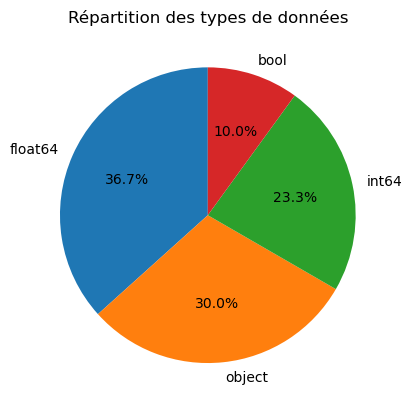

In [9]:
value_counts = df.dtypes.value_counts()
#graphique en camembert qui affiche la répartition des types de nos données
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Répartition des types de données")

<Axes: >

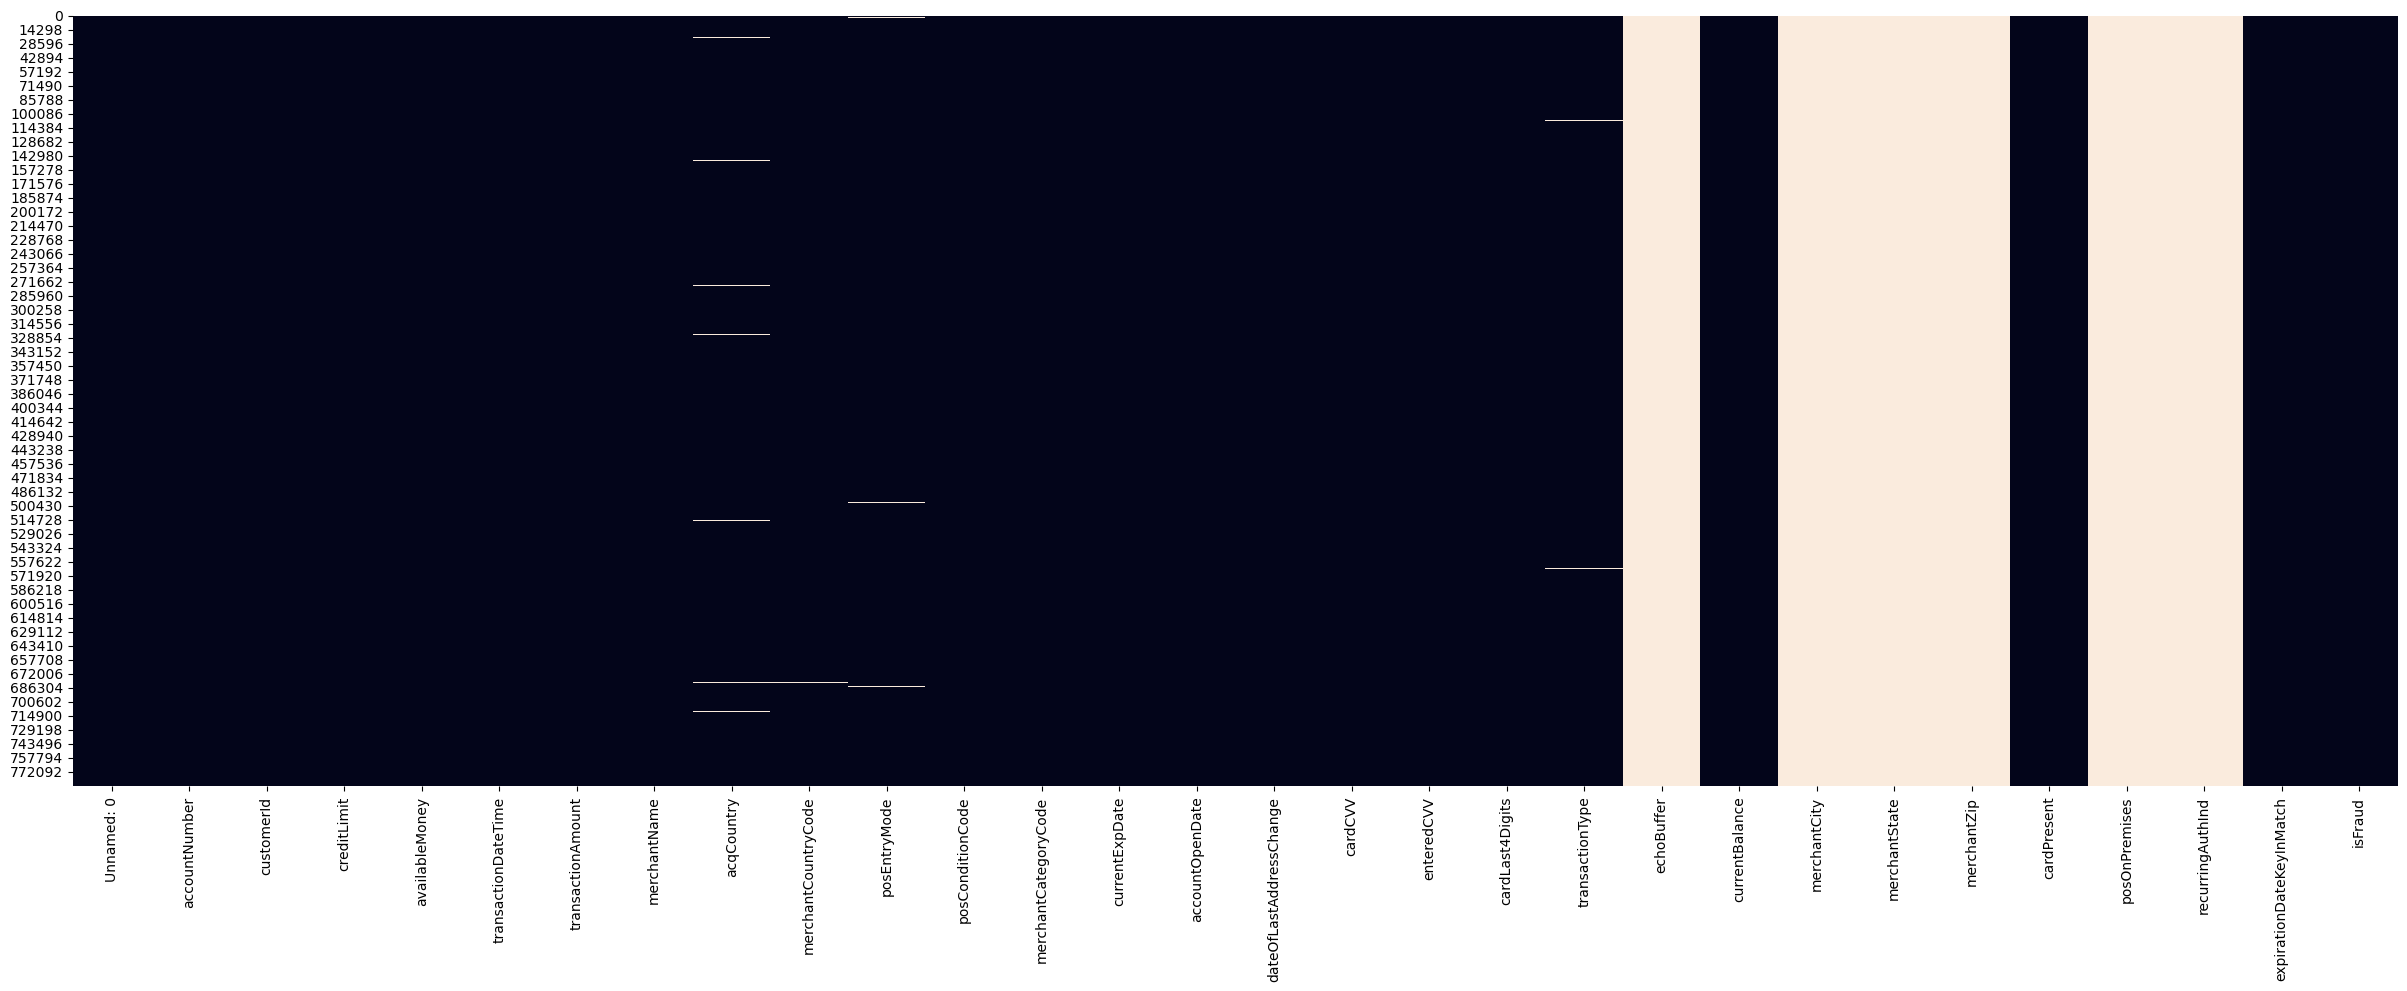

In [10]:
#isna verifie les NaN
df.isna()
plt.figure(figsize=(30,10))
#on veut voir généralement nos données (num ,categ)
sns.heatmap(df.isna(), cbar=False)

In [11]:
#nous mesurons le pourcentage de valeurs manquantes qui nous manque dans les différentes colonnes :
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Unnamed: 0                  0.000000
cardPresent                 0.000000
currentBalance              0.000000
cardLast4Digits             0.000000
enteredCVV                  0.000000
cardCVV                     0.000000
dateOfLastAddressChange     0.000000
expirationDateKeyInMatch    0.000000
currentExpDate              0.000000
merchantCategoryCode        0.000000
accountOpenDate             0.000000
isFraud                     0.000000
accountNumber               0.000000
customerId                  0.000000
merchantName                0.000000
transactionAmount           0.000000
transactionDateTime         0.000000
availableMoney              0.000000
creditLimit                 0.000000
posConditionCode            0.000520
transactionType             0.000888
merchantCountryCode         0.000921
posEntryMode                0.005155
acqCountry                  0.005801
merchantCity                1.000000
merchantState               1.000000
merchantZip                 1.000000
p

### on veut comprendre la signification de nos variables 
   **on essaye de nettoyer notre df en éliminant les colonnes inutiles de premiére vue  **

In [12]:
missing_percentage = (df.isna().sum() / df.shape[0])
filtered_columns = missing_percentage[(missing_percentage < 0.01) & (missing_percentage > 0)]
filtered_columns


acqCountry             0.005801
merchantCountryCode    0.000921
posEntryMode           0.005155
posConditionCode       0.000520
transactionType        0.000888
dtype: float64

In [13]:
# On éliminons les colonnes inutiles qui ont un 100% de NaN 
df = df[df.columns[(df.isna().sum() / df.shape[0])<1]]
pd.set_option('display.max_columns' ,30)
df.head()



,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [14]:
df.shape

(786363, 24)

<Axes: >

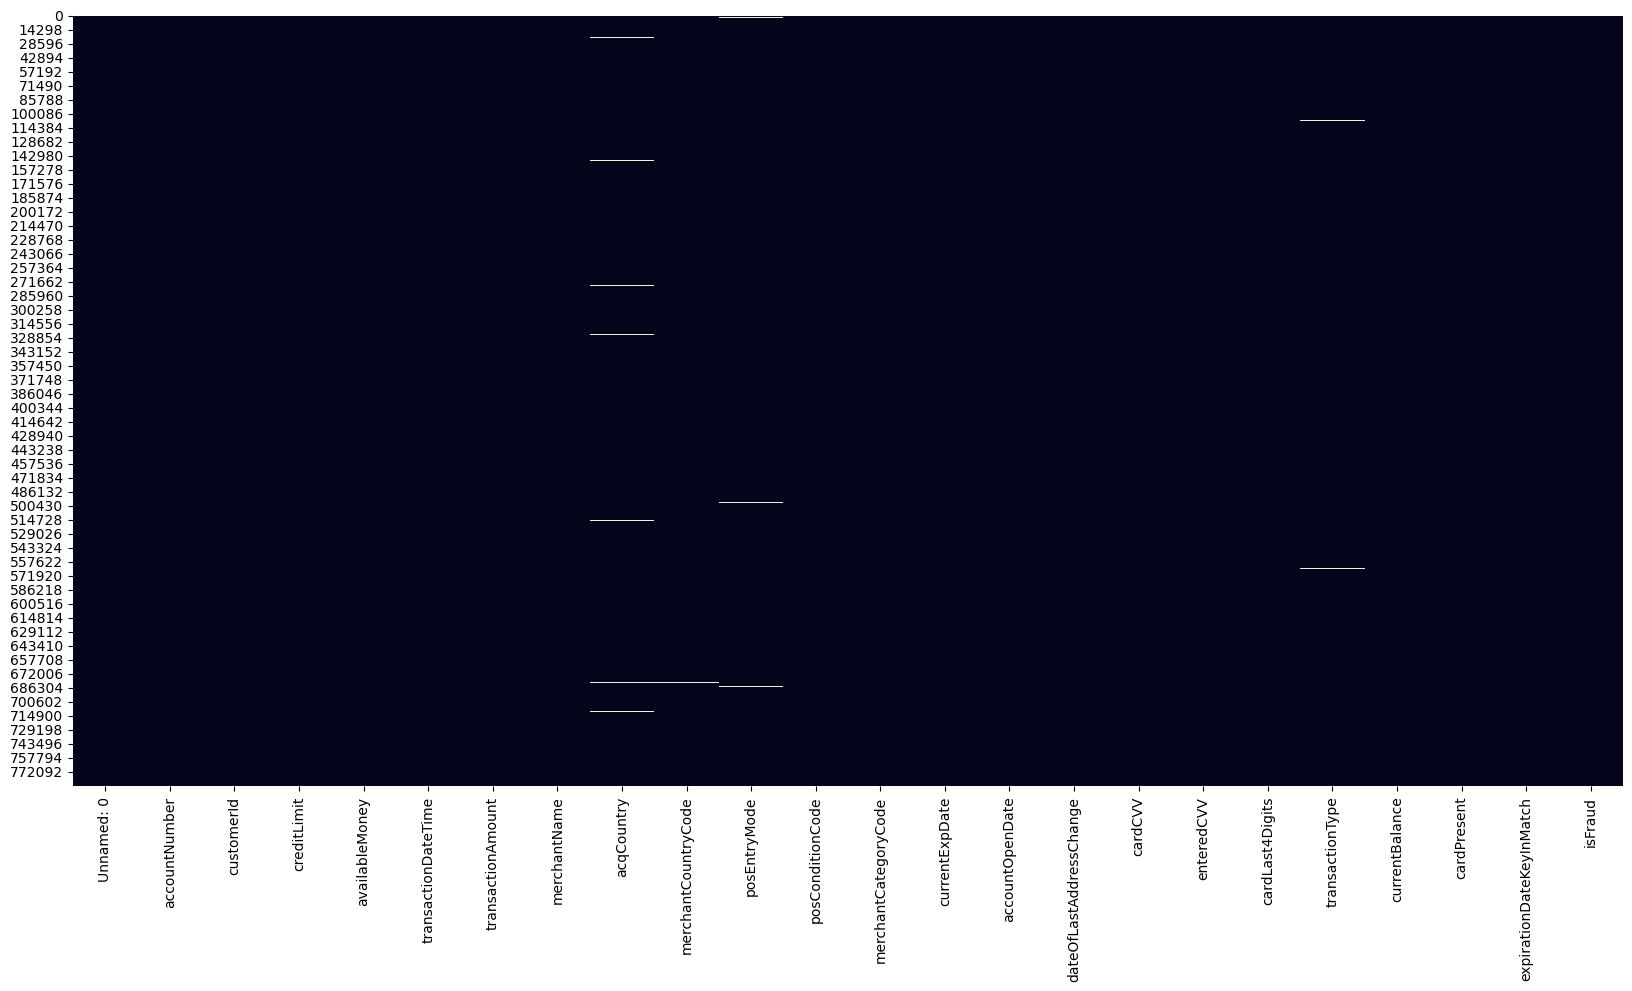

In [15]:
#on visualise nos données aprés la suppression
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

### les variables quantitatives

In [16]:
#  'Unnamed: 0'  va nous servir à rien
df = df.drop('Unnamed: 0', axis=1)


In [17]:
df.shape

(786363, 23)

In [18]:
for col in df.select_dtypes('int') :
    print(col)

accountNumber
customerId
creditLimit
cardCVV
enteredCVV
cardLast4Digits


C:\Users\hp\AppData\Local\Temp\ipykernel_19064\3275289676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\3275289676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\3275289676.

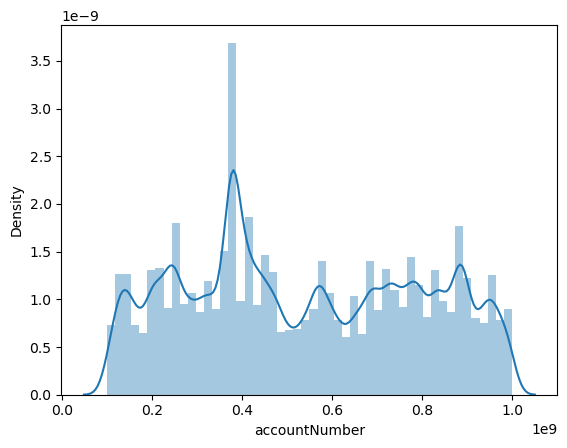

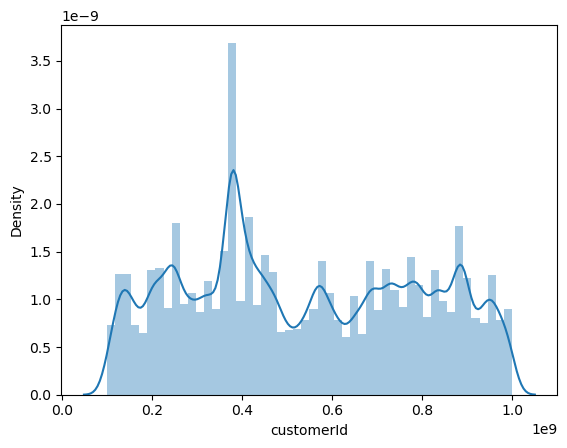

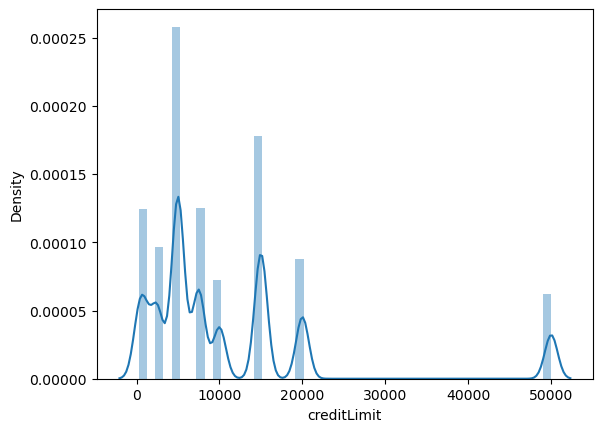

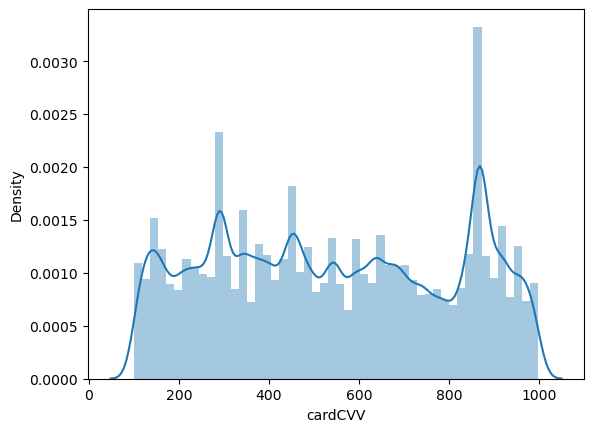

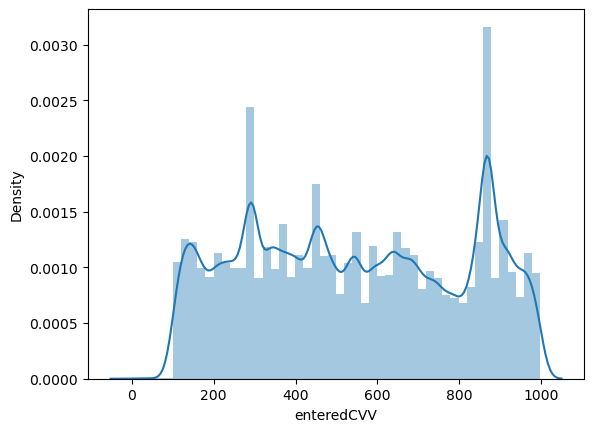

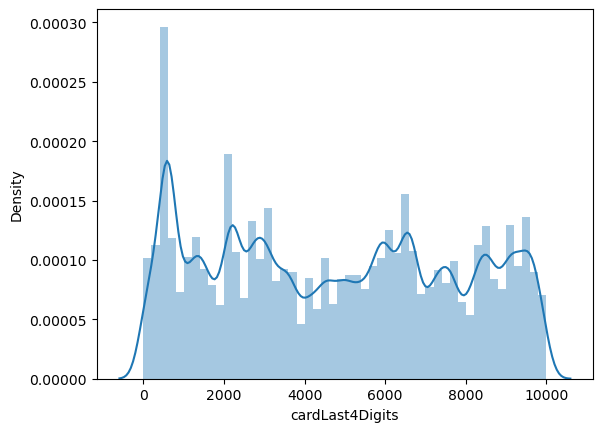

In [19]:

for col in df.select_dtypes('int') :
    plt.figure()
    sns.distplot(df[col])

#### 'accountNumber'et 'customerId':


In [20]:
if (df['accountNumber'] == df['customerId']).all():
    print('true')
else:
        print('false')
        
# on remarque que ces deux  colonnes sont identiques .
# elles ont aucun impact sur la target.


true


In [21]:
#on Supprime les colonnes d'identification.(Nous cherchons pas un client spécifique).
df.drop(columns=['accountNumber', 'customerId'], inplace=True)
# , 'cardLast4Digits'

#### 'creditLimit':

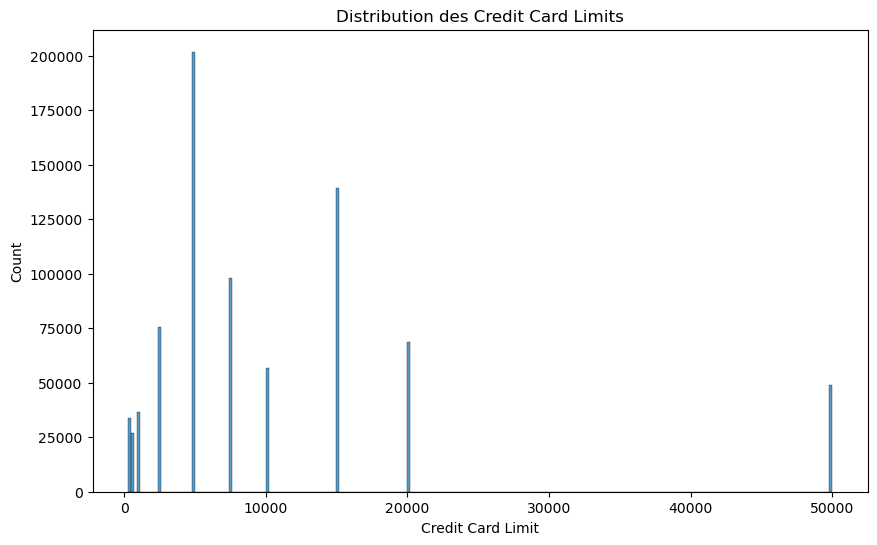

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='creditLimit')
plt.xlabel('Credit Card Limit')
plt.title('Distribution des Credit Card Limits')
plt.show()

In [23]:
#on remarque que La plupart des cartes de crédit ont une limite de 5000
#en deuxième position,ont la limite de 15000
# il existe également des cartes de crédit avec une limite de 50000.(max)

In [24]:
for col in df.select_dtypes('float') :
    print(col)

availableMoney
transactionAmount
posEntryMode
posConditionCode
currentBalance


C:\Users\hp\AppData\Local\Temp\ipykernel_19064\2117259866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\2117259866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\2117259866.

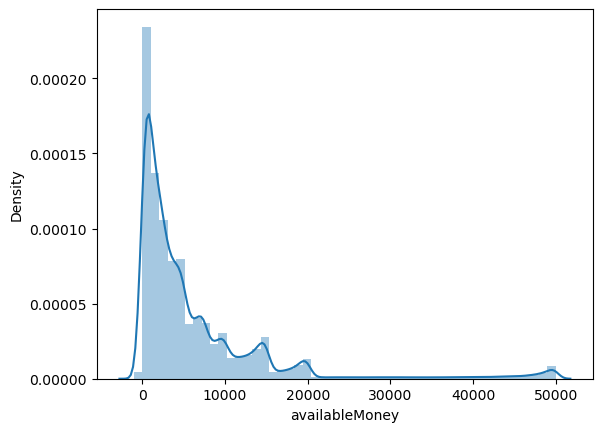

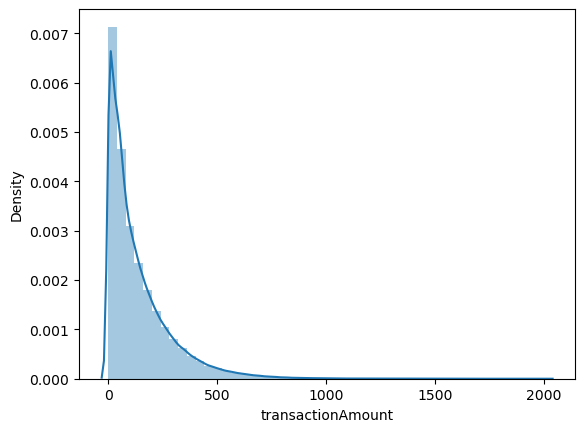

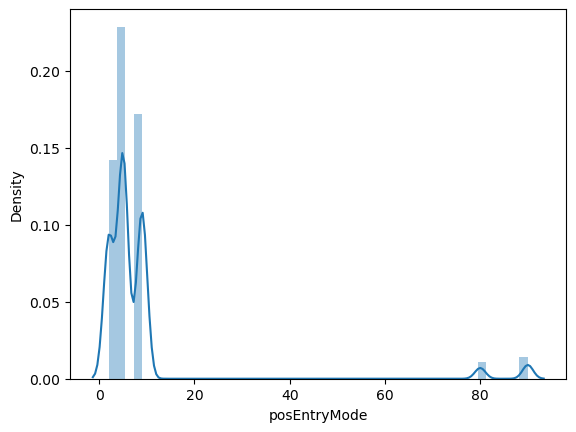

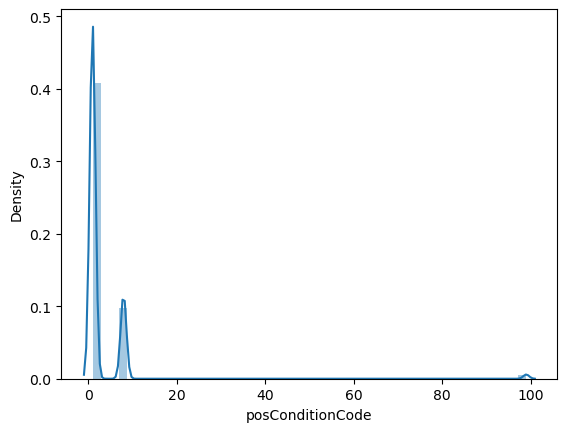

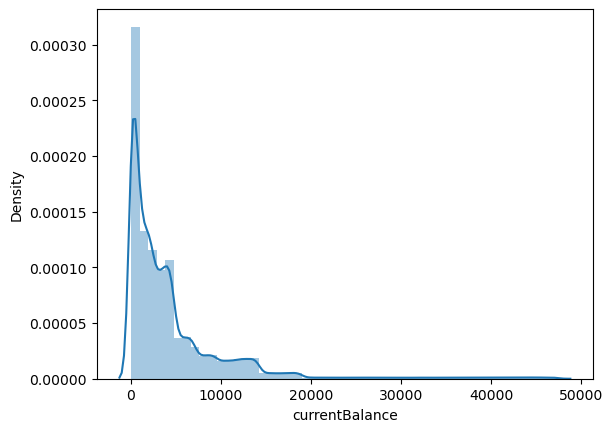

In [25]:
for col in df.select_dtypes('float') :
    plt.figure()
    sns.distplot(df[col])

#### 'posEntryMode':

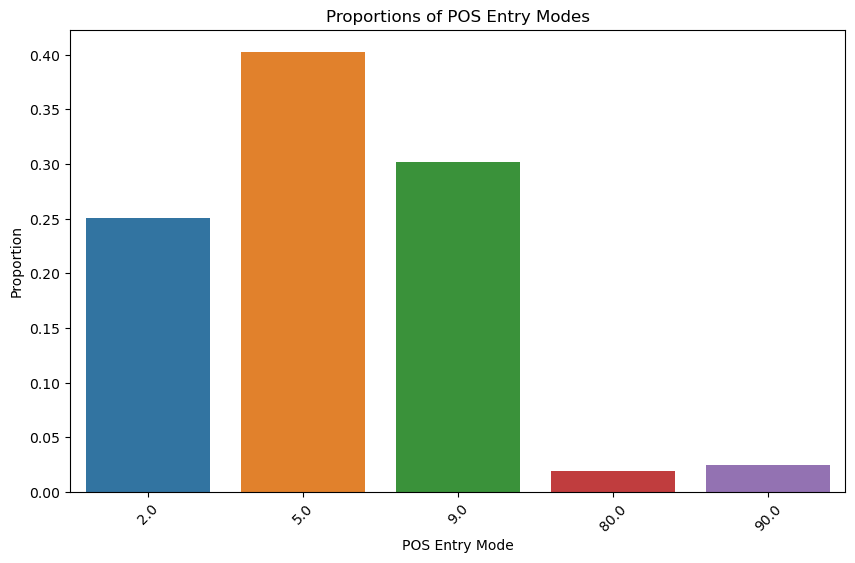

In [26]:
proportions = df['posEntryMode'].value_counts(normalize=True)

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=proportions.index, y=proportions.values)
plt.title('Proportions of POS Entry Modes')
plt.xlabel('POS Entry Mode')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

In [27]:
#on remarque qu'il y a cinq modes d'entrée POS différents
# les modes "05", "09" et "02" sont les dominants(les plus utilisés)

#### 'posConditionCode':

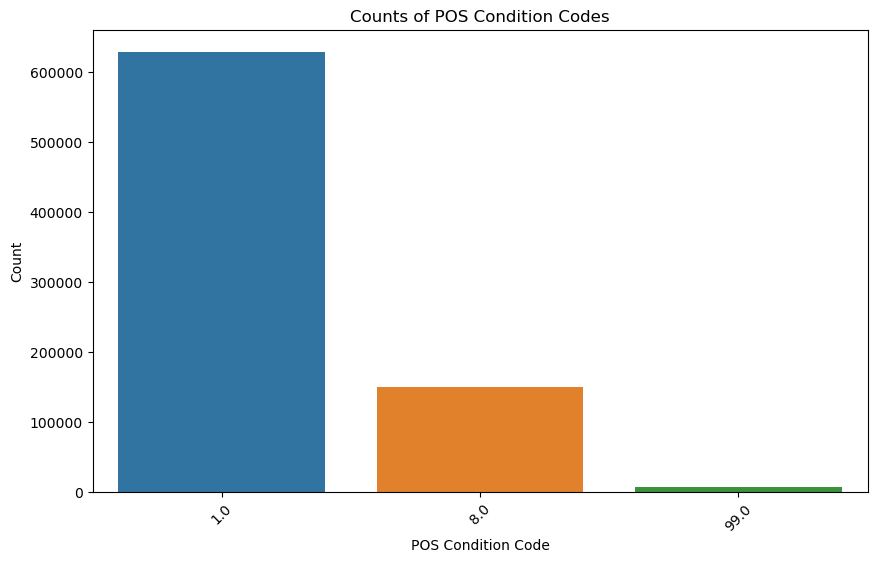

In [28]:
# Comptages des différentes catégories de posConditionCode
counts_pos_condition = df['posConditionCode'].value_counts()

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_pos_condition.index, y=counts_pos_condition.values)
plt.title('Counts of POS Condition Codes')
plt.xlabel('POS Condition Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
#on remarque qu'il existe 3  POS condition mode différents , le mode "01" est le plus dominant,

### les variables qualitatives :

In [30]:
#unique() est utilisé pour retourner les catégories présentes dans chaque variable
for col in df.select_dtypes('object') :
    print(f'{col:-<50}{df[col].unique()}\n')

transactionDateTime-------------------------------['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']

merchantName--------------------------------------['Uber' 'AMC #191138' 'Play Store' ... 'ATT #141119' 'EZ Wireless #200746'
 'Runners #747070']

acqCountry----------------------------------------['US' nan 'CAN' 'MEX' 'PR']

merchantCountryCode-------------------------------['US' 'CAN' nan 'PR' 'MEX']

merchantCategoryCode------------------------------['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']

currentExpDate------------------------------------['06/2023' '02/2024' '08/2025' '10/2029' '01/2020' '05/2020' '01/2021'
 '08/2032' '04/2020' '05/2023' '08/2024' '12/2031' '09/2027' '08/2022'
 '11/2027' '08/2028' '0

In [31]:
#selectionne les colonnes contiennent des dates 
date_cols = ['transactionDateTime', 'currentExpDate',
             'accountOpenDate', 'dateOfLastAddressChange']
# supprimer date_cols
df.drop(columns=date_cols, inplace=True)

#selectionne les colonnes cntient beaucoups de strings : 
string_cols = ['merchantCategoryCode', 'merchantName'] 
# supprimer les deux colonnes
df.drop(columns=string_cols, inplace=True)
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,98.55,US,US,2.0,1.0,414,414,1803,PURCHASE,0.0,False,False,False
1,5000,5000.0,74.51,US,US,9.0,1.0,486,486,767,PURCHASE,0.0,True,False,False
2,5000,5000.0,7.47,US,US,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,False
3,5000,5000.0,7.47,US,US,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,False
4,5000,5000.0,71.18,US,US,2.0,1.0,885,885,3143,PURCHASE,0.0,True,False,False


In [32]:
# on veut calculer le nbr de valeur qu'on a dans chaque catégorie
for col in df.select_dtypes('object') :
    print('____________________________________________________________________')

    print(df[col].value_counts())

____________________________________________________________________
acqCountry
US     774709
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64
____________________________________________________________________
merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64
____________________________________________________________________
transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64


#### 'merchantCountryCode':

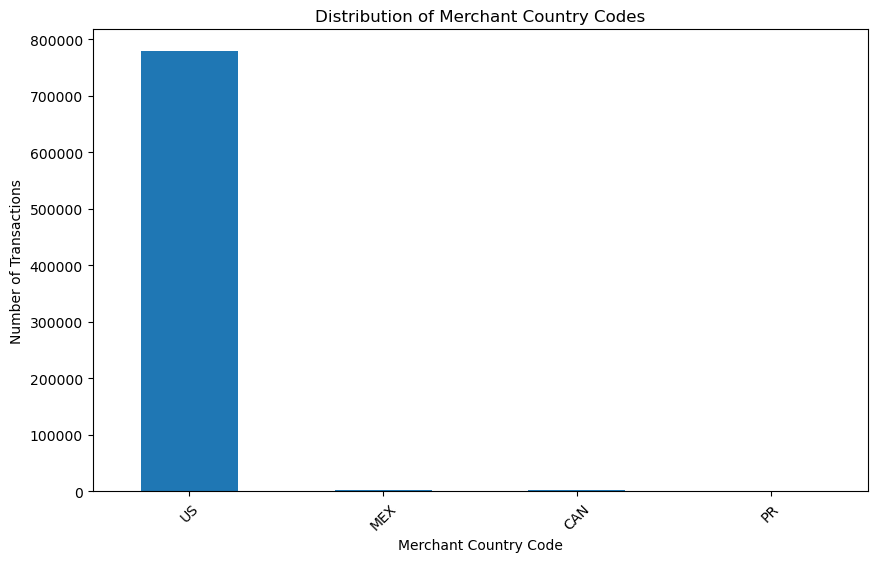

In [33]:
merchant_country_counts = df['merchantCountryCode'].value_counts()

plt.figure(figsize=(10, 6))
merchant_country_counts.plot(kind='bar')
plt.xlabel('Merchant Country Code')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Merchant Country Codes')
plt.xticks(rotation=45)
plt.show()

In [34]:
df['merchantCountryCode'].value_counts(normalize=True)

merchantCountryCode
US     0.990927
MEX    0.004001
CAN    0.003088
PR     0.001984
Name: proportion, dtype: float64

In [35]:
#Il existe quatre types de code merchantCountry.
# (US) est  dominant
# on a eu l'idée de créer une colonne (ckeck si la carte est bien dans son pays lors de transaction)[bool]

#### 'transactionType' 

In [36]:
df['transactionType'].value_counts()

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64

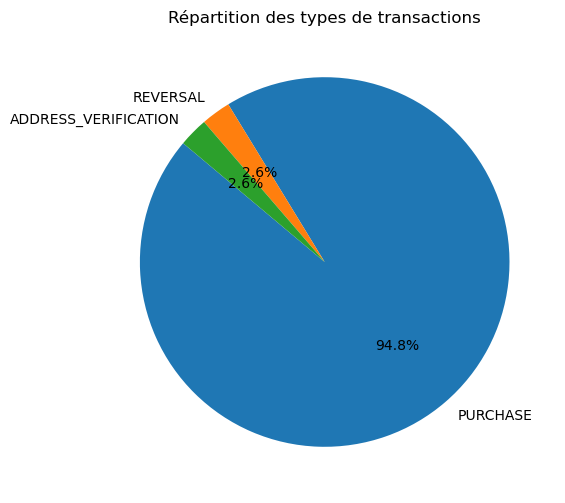

In [37]:
#types de transactions : 
trans = df['transactionType'].value_counts()

# Créer un graphique en camembert 
plt.figure(figsize=(6, 6))
plt.pie(trans, labels=trans.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des types de transactions')
plt.show()

- on remarque qu'on a 3 types de transactions :


     ->PURCHASE (dominant)--------------------(Achat)
     
    
    ->REVERSAL------------------------------------(signifie qu'une transaction précédente(un achat), a été annulée)
    
    ->ADDRESS_VERIFICATION--------------(transaction associé à la vérification d'adresse pour une carte de crédit ou de débit)


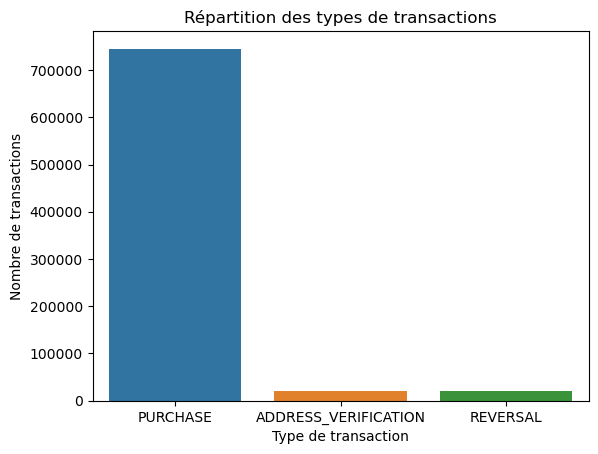

In [38]:
# repartition de types 
sns.countplot(data=df, x='transactionType')
plt.title('Répartition des types de transactions')
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions')
plt.show()

In [39]:
#les colonnes contiennent des valeurs null
print(df.isnull().any())
print('_____________________________________')

#les colonnes contiennent des NaN
print(df.isnull().sum())
print('_____________________________________')

#les colonnes contiennent les valeurs vides 
print(df.eq('').sum())

creditLimit                 False
availableMoney              False
transactionAmount           False
acqCountry                   True
merchantCountryCode          True
posEntryMode                 True
posConditionCode             True
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType              True
currentBalance              False
cardPresent                 False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool
_____________________________________
creditLimit                    0
availableMoney                 0
transactionAmount              0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationD

In [40]:
#on remarque qu'on n'a aucun mot vide ('')
#on a 5 colonnes contiennes des valeurs manquantes

In [41]:
#type boolean 
for col in df.select_dtypes('bool') :
    print(col)

cardPresent
expirationDateKeyInMatch
isFraud


#### 'cardPresent' :

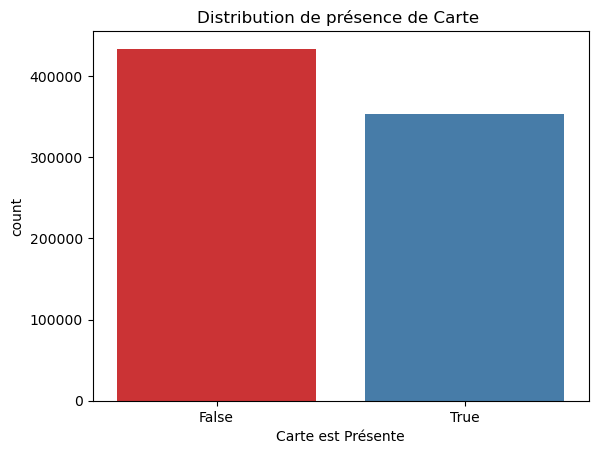

In [42]:
# histogramme pour la distribution de cardPresent
sns.countplot(data=df, x='cardPresent', palette='Set1')
plt.xlabel('Carte est Présente')
#plt.ylabel('Count')
plt.title('Distribution de présence de Carte ')
plt.show()

In [43]:
# 'cardPresent'a une distribution équilibrée entre les deux valeurs (True et False) pour cette variable.

#### 'isFraud' :

In [44]:
#la variable target 
df['isFraud'].value_counts()
#normalize= True

isFraud
False    773946
True      12417
Name: count, dtype: int64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='isFraud', ylabel='Count'>

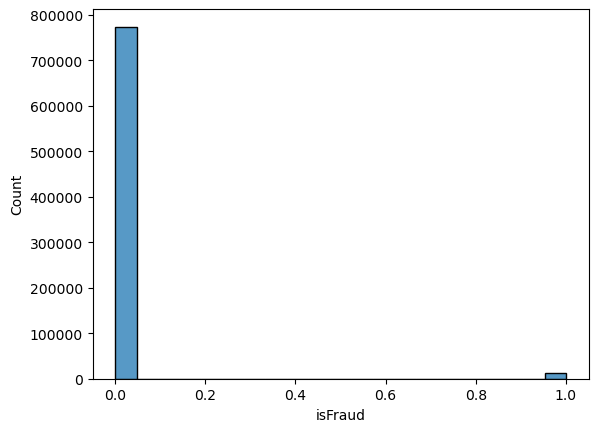

In [45]:
# visualiser la répartition (true|false)
sns.histplot(df['isFraud'])


Text(0.5, 1.0, 'Répartition des fraudes')

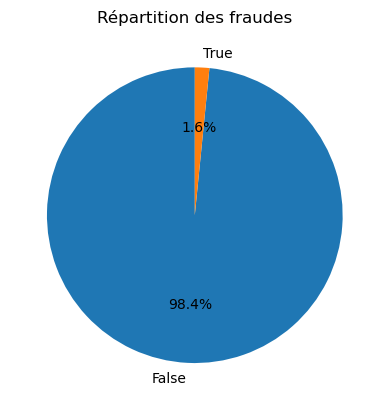

In [46]:
val = df['isFraud'].value_counts()
#graphique en camembert 
plt.pie(val, labels=val.index, autopct='%1.1f%%', startangle=90)

plt.title("Répartition des fraudes")

In [47]:
#la distribution n'est pas équilibrée

#### 'expirationDateKeyInMatch' :

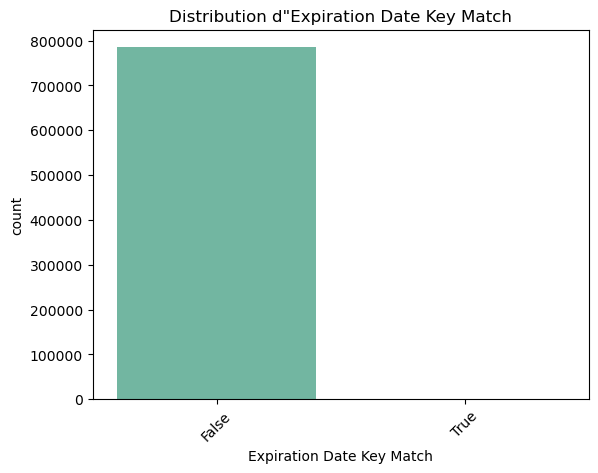

In [48]:
# Créer un histogramme pour la distribution de expirationDateKeyInMatch
sns.countplot(data=df, x='expirationDateKeyInMatch', palette='Set2')
plt.xlabel('Expiration Date Key Match')
plt.title('Distribution d"Expiration Date Key Match')
plt.xticks(rotation=45)
plt.show()

In [49]:
df['expirationDateKeyInMatch'].value_counts(normalize=True)

expirationDateKeyInMatch
False    0.998674
True     0.001326
Name: proportion, dtype: float64

In [50]:
a=df.groupby(['expirationDateKeyInMatch','isFraud']).size()
a

expirationDateKeyInMatch  isFraud
False                     False      772916
                          True        12404
True                      False        1030
                          True           13
dtype: int64

In [51]:
#  la plupart des valeurs de la caractéristique "expirationDateKeyInMatch" sont égales à 0.
# on peut déduire que cette variable ne peut pas affecter une transaction si elle est frauduleuse.

In [52]:
#on supprime la colonne
df.drop(['expirationDateKeyInMatch'], axis=1, inplace=True)


## Relation Variables / Target : 
on veux détaillé plus dans notre analyse en cherchant les relations entre isFraud et les autres variables .

In [53]:
# #on visualise les différentes relations 
# #object : 
# for col in df.select_dtypes('object'): 
#     plt.figure()
#     sns.heatmap(pd.crosstab(df['isFraud'],df[col]),annot=True,fmt='d' )

In [54]:
# verifions les NaN pour les colonnes de type object 
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print(df[i].unique())
    print('______________________________________________________')

acqCountry
US     774709
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64
['US' nan 'CAN' 'MEX' 'PR']
______________________________________________________
merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64
['US' 'CAN' nan 'PR' 'MEX']
______________________________________________________
transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
______________________________________________________


In [55]:
#on supprime les lignes qui contiennent des nan dans les colonnes .

df.dropna(inplace=True)


In [56]:
# verifions si  valeurs manquantes sont bien étaient supprimé pour les colonnes de type object 
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print(df[i].unique())
    print('______________________________________________________')

acqCountry
US     769620
MEX      3110
CAN      2406
PR       1532
Name: count, dtype: int64
['US' 'CAN' 'MEX' 'PR']
______________________________________________________
merchantCountryCode
US     769621
MEX      3107
CAN      2399
PR       1541
Name: count, dtype: int64
['US' 'CAN' 'PR' 'MEX']
______________________________________________________
transactionType
PURCHASE                736636
REVERSAL                 20062
ADDRESS_VERIFICATION     19970
Name: count, dtype: int64
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL']
______________________________________________________


In [57]:
#les colonnes contiennent des NaN
print(df.isnull().sum())
print(df.dtypes)


creditLimit            0
availableMoney         0
transactionAmount      0
acqCountry             0
merchantCountryCode    0
posEntryMode           0
posConditionCode       0
cardCVV                0
enteredCVV             0
cardLast4Digits        0
transactionType        0
currentBalance         0
cardPresent            0
isFraud                0
dtype: int64
creditLimit              int64
availableMoney         float64
transactionAmount      float64
acqCountry              object
merchantCountryCode     object
posEntryMode           float64
posConditionCode       float64
cardCVV                  int64
enteredCVV               int64
cardLast4Digits          int64
transactionType         object
currentBalance         float64
cardPresent               bool
isFraud                   bool
dtype: object


### 2. Merchant Country Code vs Fraud

Text(0.5, 0.98, 'Merchant Country Code vs is Fraud')

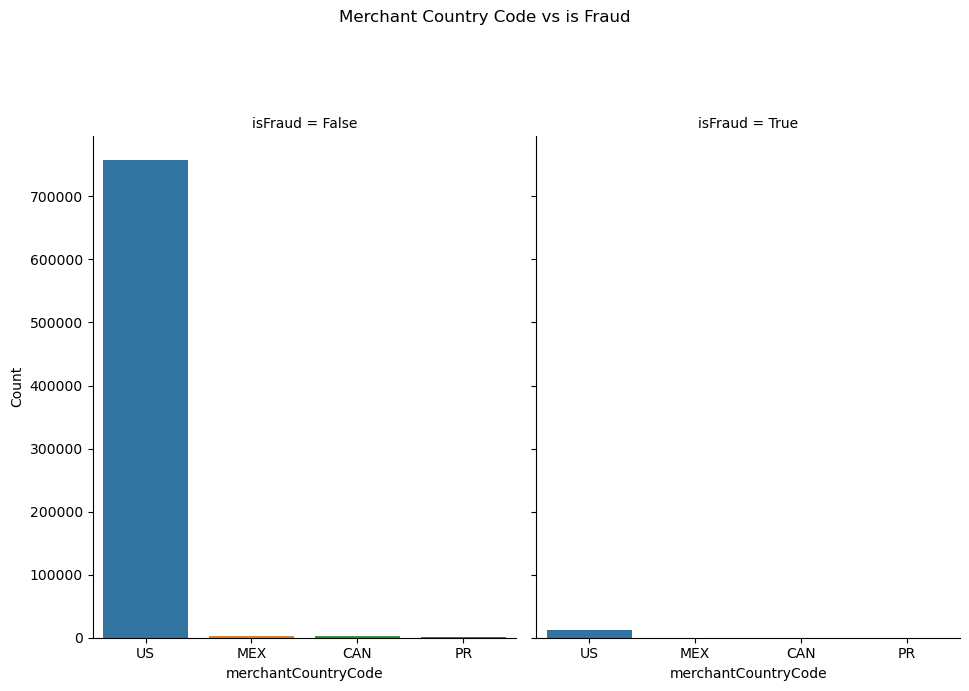

In [58]:
b=df.groupby(['merchantCountryCode','isFraud']).size().sort_values(ascending=False).reset_index(name='Count')
graph = sns.catplot(x="merchantCountryCode", y="Count",col="isFraud",
                data=b, kind="bar",
                height=7, aspect=.7);
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle("Merchant Country Code vs is Fraud")

In [59]:
a=df.groupby(['merchantCountryCode','isFraud']).size()
a

merchantCountryCode  isFraud
CAN                  False        2348
                     True           51
MEX                  False        3044
                     True           63
PR                   False        1515
                     True           26
US                   False      757795
                     True        11826
dtype: int64

In [60]:
print(' La proportion de transactions frauduleuses = True parmi toutes les transactions de chaque pays:')
print('(CAN) :',56/2426*100,'%')
print('(MEX):',64/3143*100,'%')
print('((PR):',27/1559*100,'%')
print('(US):',12188/778511*100,'%')

 La proportion de transactions frauduleuses = True parmi toutes les transactions de chaque pays:
(CAN) : 2.3083264633140974 %
(MEX): 2.036271078587337 %
((PR): 1.731879409878127 %
(US): 1.565552702530857 %


In [61]:
# créons la colonne card_in_country (on veux verifier  si la transaction s'est déroulée dans le même pays que celui où la carte a été émise)

df['card_in_country'] = df.merchantCountryCode == df.acqCountry

# supprimons les anciennes colonnes 
df.drop(columns=['merchantCountryCode', 'acqCountry'], inplace=True)
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country
0,5000,5000.0,98.55,2.0,1.0,414,414,1803,PURCHASE,0.0,False,False,True
1,5000,5000.0,74.51,9.0,1.0,486,486,767,PURCHASE,0.0,True,False,True
2,5000,5000.0,7.47,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,True
3,5000,5000.0,7.47,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,True
4,5000,5000.0,71.18,2.0,1.0,885,885,3143,PURCHASE,0.0,True,False,True


### 3. isFraud vs transactionType 

In [62]:
#groupby
df.groupby(['transactionType', 'isFraud']).size()


transactionType       isFraud
ADDRESS_VERIFICATION  False       19856
                      True          114
PURCHASE              False      725108
                      True        11528
REVERSAL              False       19738
                      True          324
dtype: int64

In [63]:
#int

#### création une colonne 'checked_cvv' 

In [64]:
# créons la colonne checked_CVV (ici je veux verifier si 'enteredCVV' est meme que'cardCVV')

df['checked_CVV'] = df.cardCVV == df.enteredCVV

# supprimons les anciennes colonnes de CVV
df.drop(columns=['cardCVV', 'enteredCVV'], inplace=True)
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country,checked_CVV
0,5000,5000.0,98.55,2.0,1.0,1803,PURCHASE,0.0,False,False,True,True
1,5000,5000.0,74.51,9.0,1.0,767,PURCHASE,0.0,True,False,True,True
2,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
3,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
4,5000,5000.0,71.18,2.0,1.0,3143,PURCHASE,0.0,True,False,True,True


In [65]:
#float

In [66]:
"""# Créer une colonne qui indique si le solde actuel est dépassé par le montant de la transaction
df['vider_compte'] = df['transactionAmount'] >= df['currentBalance']
print(df['vider_compte'] .sum())
# Filtrer les transactions frauduleuses où le compte est vidé
transactions_frauduleuses_videes = df[(df['vider_compte']) & (df['isFraud'] == 1)]

# Afficher les transactions frauduleuses où le compte est vidé
print("Transactions frauduleuses où le compte est vidé:")
print(transactions_frauduleuses_videes.shape[0])
"""


'# Créer une colonne qui indique si le solde actuel est dépassé par le montant de la transaction\ndf[\'vider_compte\'] = df[\'transactionAmount\'] >= df[\'currentBalance\']\nprint(df[\'vider_compte\'] .sum())\n# Filtrer les transactions frauduleuses où le compte est vidé\ntransactions_frauduleuses_videes = df[(df[\'vider_compte\']) & (df[\'isFraud\'] == 1)]\n\n# Afficher les transactions frauduleuses où le compte est vidé\nprint("Transactions frauduleuses où le compte est vidé:")\nprint(transactions_frauduleuses_videes.shape[0])\n'

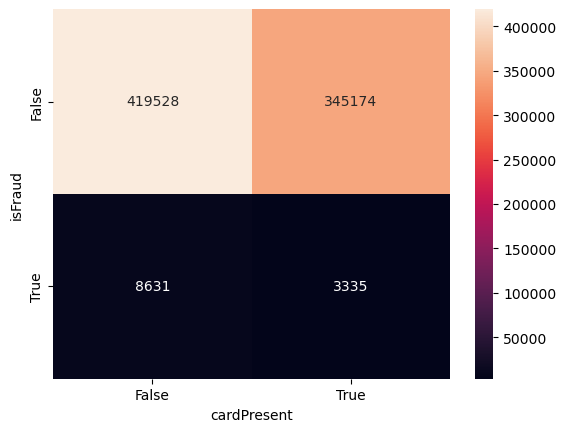

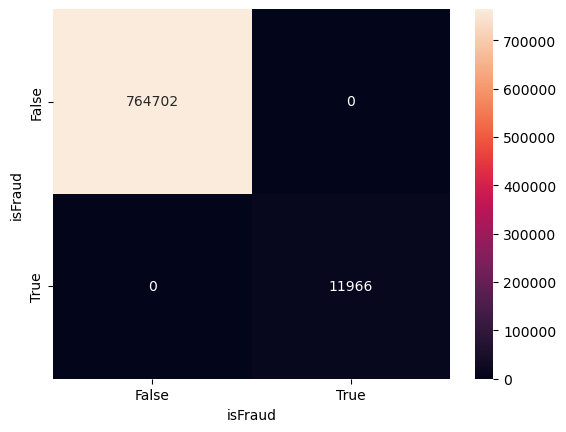

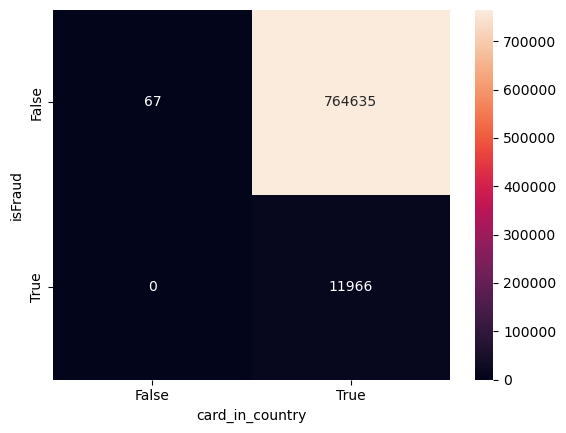

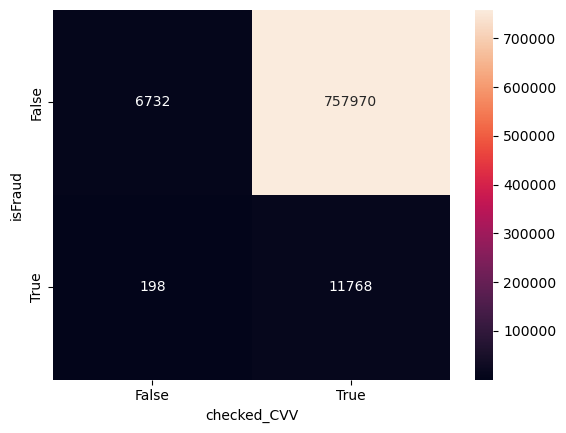

In [67]:
#bool : 
for col in df.select_dtypes('bool'): 
    plt.figure()
    sns.heatmap(pd.crosstab(df['isFraud'],df[col]),annot=True,fmt='d' )

### 1.Fraud vs Card Present

Text(0.5, 0.98, 'Fraud vs Card Present')

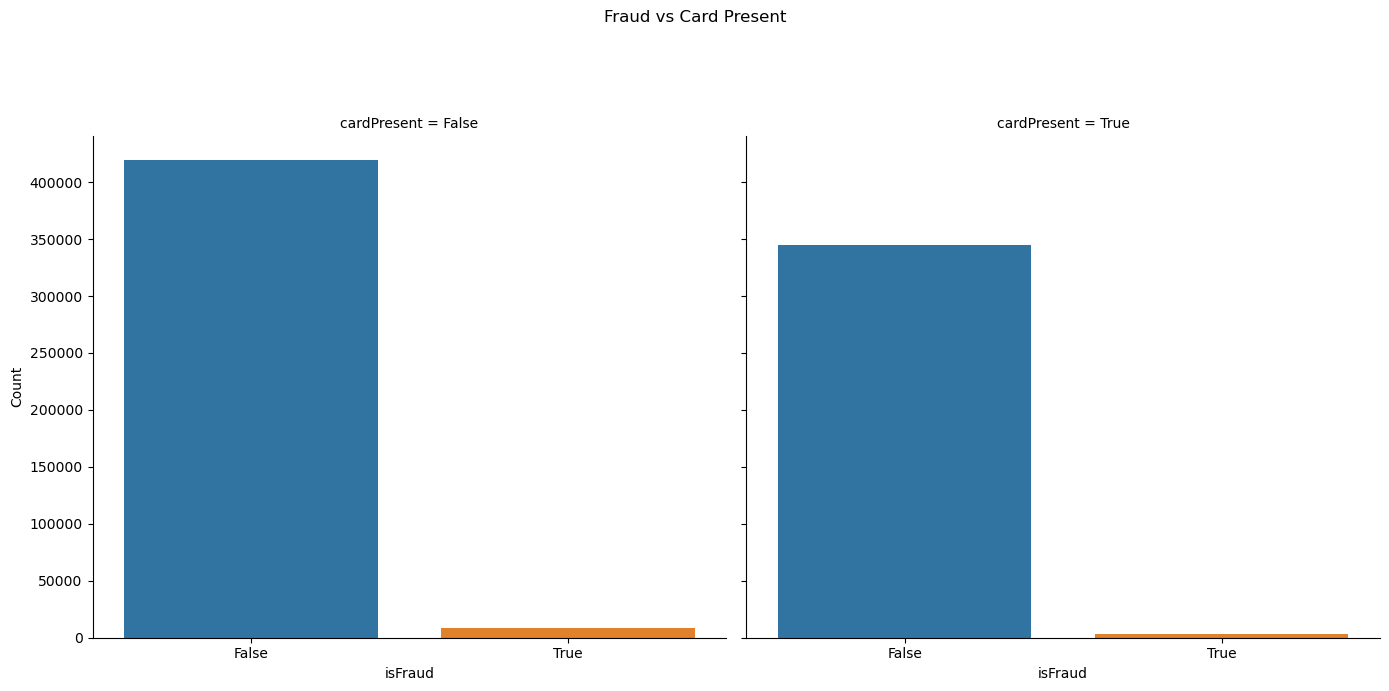

In [68]:
#on veut voir  que la présence de carte a un impact sur  le pourcentage de  fraude= true 
a=df.groupby(['cardPresent','isFraud']).size().sort_values(ascending=False).reset_index(name='Count')
graph = sns.catplot(x="isFraud", y="Count",col="cardPresent",
                data=a, kind="bar",height=7);
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle("Fraud vs Card Present")

In [69]:
a=df.groupby(['cardPresent','isFraud']).size().sort_values(ascending=False)
a


cardPresent  isFraud
False        False      419528
True         False      345174
False        True         8631
True         True         3335
dtype: int64

In [70]:
fraud_proportions = df[df['isFraud'] == True].groupby('cardPresent').size() / len(df[df['isFraud'] == True])
print('isFraud = true \n',fraud_proportions)

isFraud = true 
 cardPresent
False    0.721294
True     0.278706
dtype: float64


In [71]:
#on remarque que le pourcentage de transactions frauduleuses est plus élevé lorsque la carte n'est pas présente

In [72]:
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country,checked_CVV
0,5000,5000.0,98.55,2.0,1.0,1803,PURCHASE,0.0,False,False,True,True
1,5000,5000.0,74.51,9.0,1.0,767,PURCHASE,0.0,True,False,True,True
2,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
3,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
4,5000,5000.0,71.18,2.0,1.0,3143,PURCHASE,0.0,True,False,True,True


In [73]:
df.shape

(776668, 12)

In [74]:
# on vérifie le shape des lignes uniques avant la suppression 
df.drop_duplicates().shape


(771673, 12)

In [75]:
#supprimons les duplications en conservant les lignes uniques
df.drop_duplicates(inplace=True)

In [76]:
df.shape

(771673, 12)

<Axes: xlabel='isFraud', ylabel='count'>

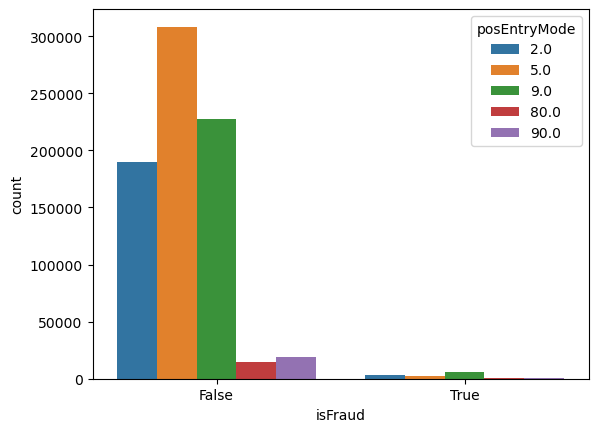

In [77]:
#int : 
sns.countplot(x='isFraud',hue='posEntryMode',data=df)

In [78]:
df.groupby(['posEntryMode','isFraud']).size().sort_values(ascending=False)


posEntryMode  isFraud
5.0           False      308242
9.0           False      227639
2.0           False      189987
90.0          False       18984
80.0          False       14858
9.0           True         5560
2.0           True         3387
5.0           True         2412
90.0          True          367
80.0          True          237
dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

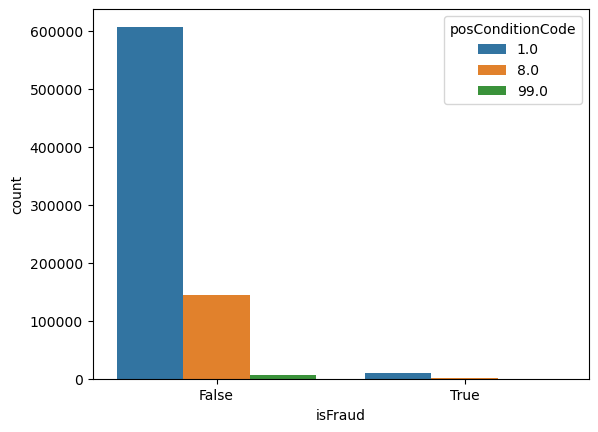

In [79]:
#float : 
sns.countplot(x='isFraud',hue='posConditionCode',data=df)

In [80]:
df.dtypes.value_counts()

float64    5
bool       4
int64      2
object     1
Name: count, dtype: int64

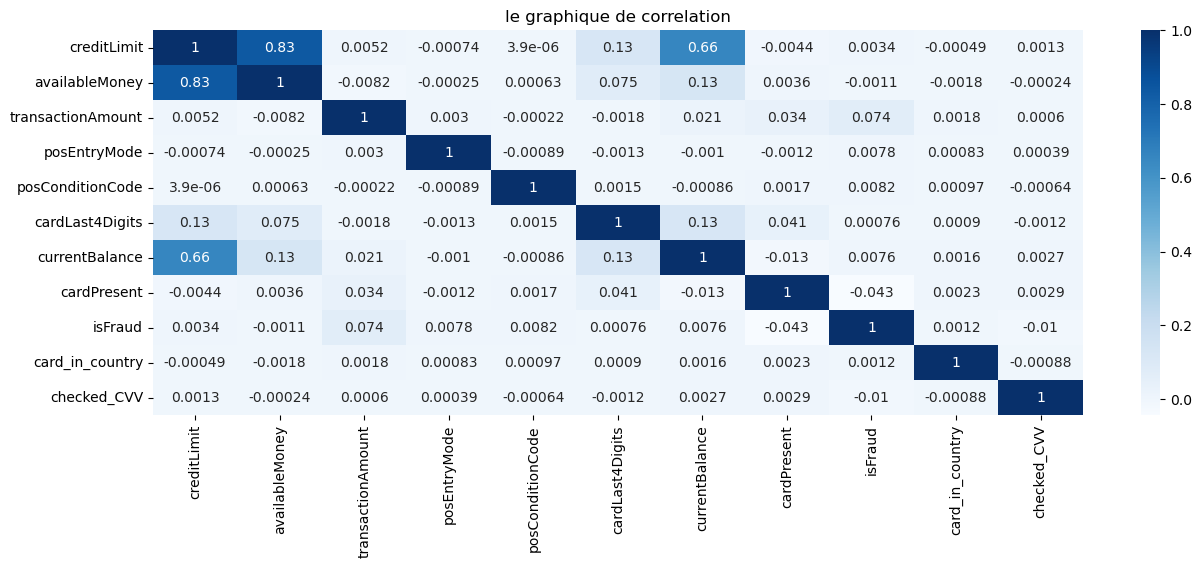

In [81]:
plt.figure(figsize=(15,5))
sns.heatmap(df.select_dtypes(include=['int','float','bool']).corr(), cmap='Blues', annot=True)
plt.title('le graphique de correlation')
plt.show()


# preprocessing : 

In [82]:
df.select_dtypes('bool')

,cardPresent,isFraud,card_in_country,checked_CVV
0,False,False,True,True
1,True,False,True,True
2,False,False,True,True
4,True,False,True,True
5,True,False,True,True
...,...,...,...,...
786358,False,False,True,True
786359,False,False,True,True
786360,False,False,True,True
786361,False,False,True,True


### outliers

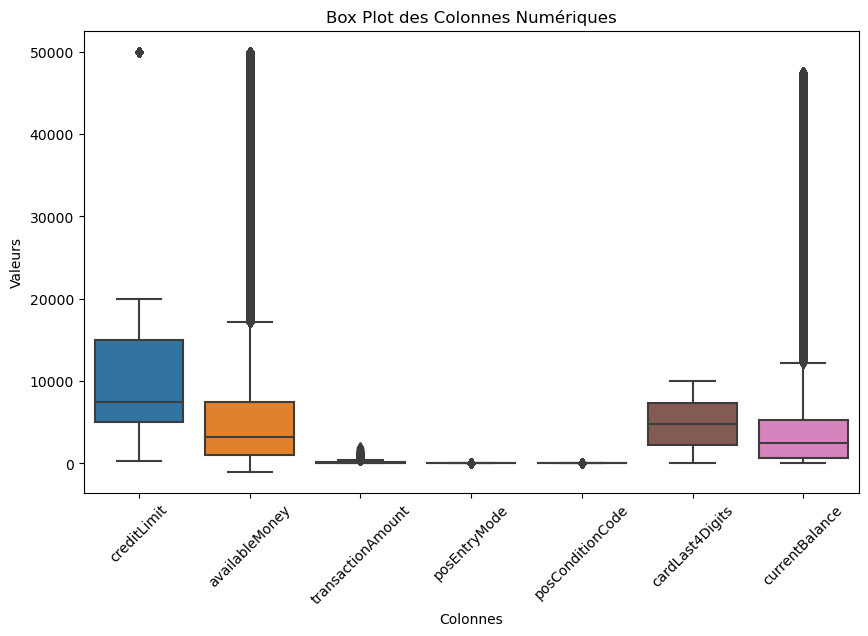

In [83]:
# Sélectionner les colonnes de types int et float
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Tracer un box plot pour chaque colonne numérique
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.title("Box Plot des Colonnes Numériques")
plt.xlabel("Colonnes")
plt.ylabel("Valeurs")
plt.show()

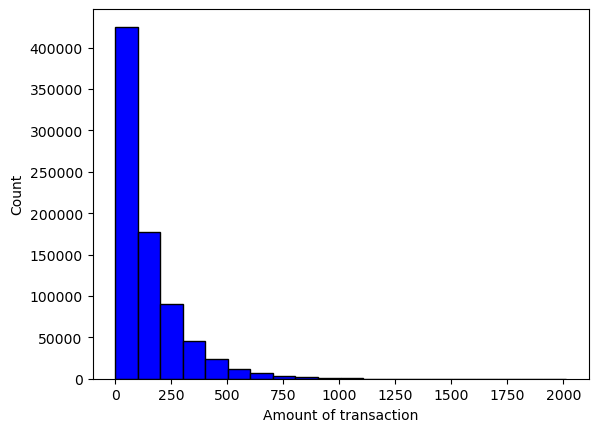

In [84]:
# outliers dans transactionAmount
plt.hist(data['transactionAmount'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Amount of transaction', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

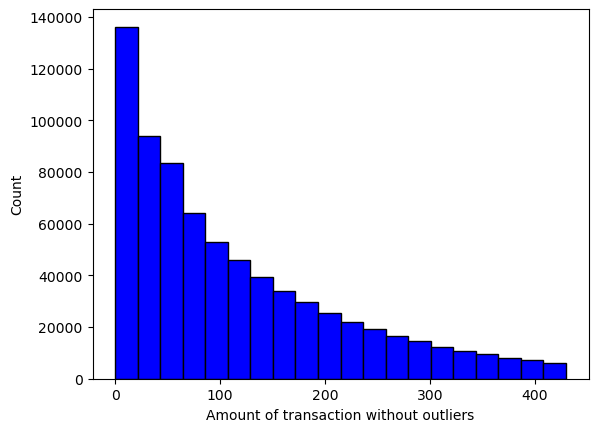

In [85]:
#transaction values should be no less than 0 on supprime les transactions moins de 0 . ( < 0 ) 
#On supprime aussi les outlier qui sont plus de  Q3 + 1.5IQR
q1, q3 = np.percentile(sorted(df.transactionAmount),[25,75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr)
df['transactionAmount'] = df['transactionAmount'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

plt.hist(df['transactionAmount'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Amount of transaction without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

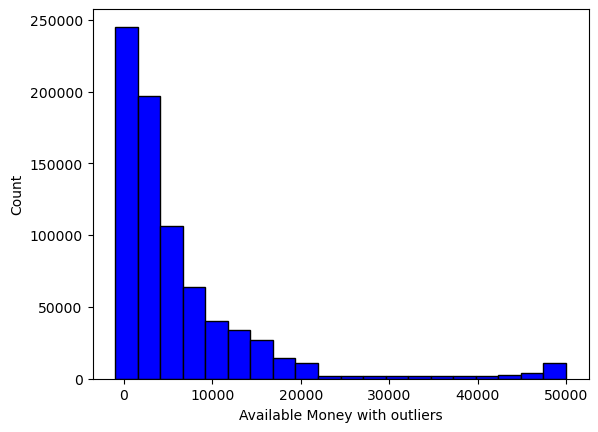

In [86]:
# outliers  dans availableMoney

plt.hist(df['availableMoney'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Available Money with outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

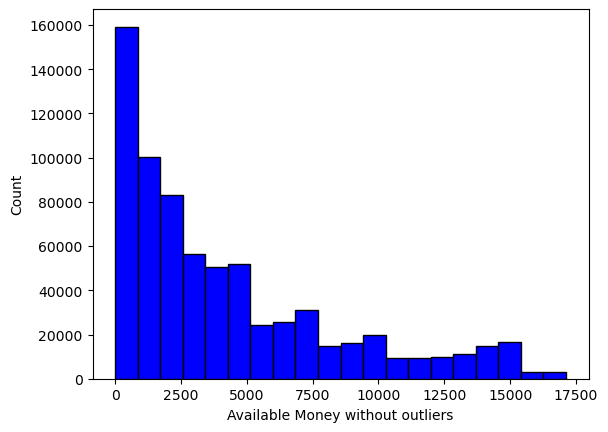

In [87]:
# on supprime les outliers
Q3 + 1.5*IQR
q1, q3 = np.percentile(sorted(df.availableMoney), [25, 75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr)
df.availableMoney = df.availableMoney[df.availableMoney.between(lower_bound, upper_bound)]

plt.hist(df.availableMoney, color='blue', edgecolor='black', bins=20)
plt.xlabel('Available Money without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()


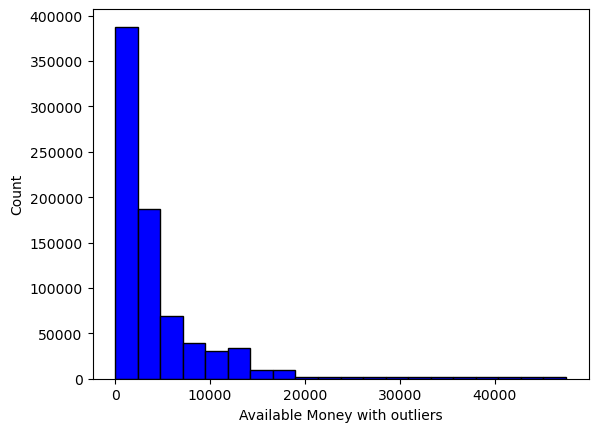

In [88]:
# outliers dans currentBalance

plt.hist(data['currentBalance'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Available Money with outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

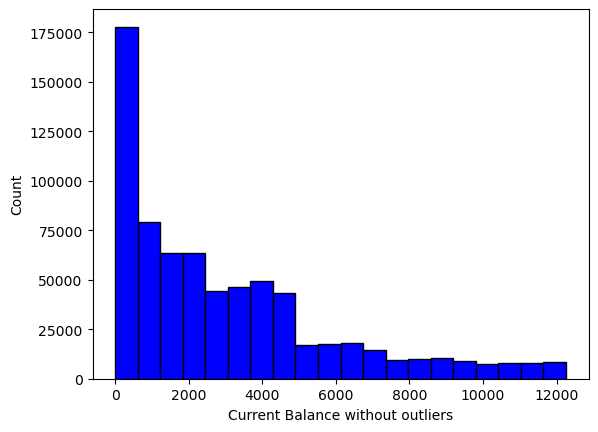

In [89]:
# on supprime les outliers

q1, q3 = np.percentile(sorted(df.currentBalance), [25, 75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr)
df.currentBalance= df.currentBalance[df.currentBalance.between(lower_bound, upper_bound)]

plt.hist(df.currentBalance, color='blue', edgecolor='black', bins=20)
plt.xlabel('Current Balance without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()


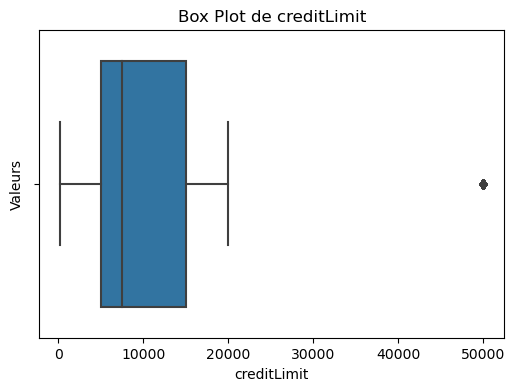

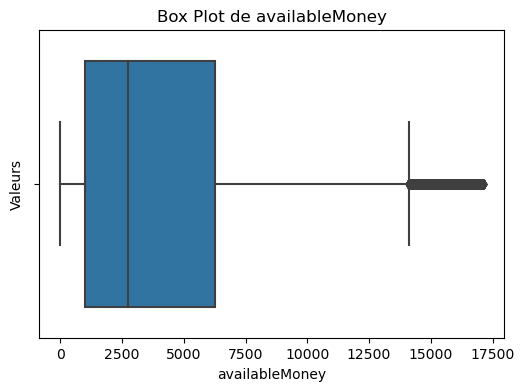

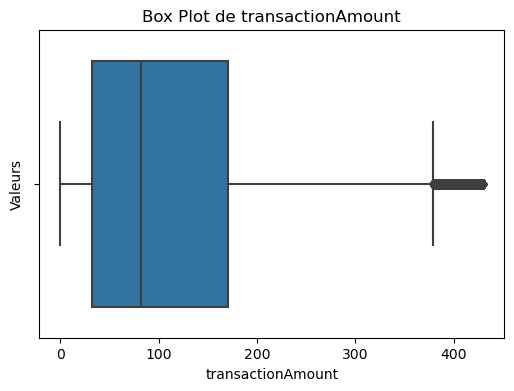

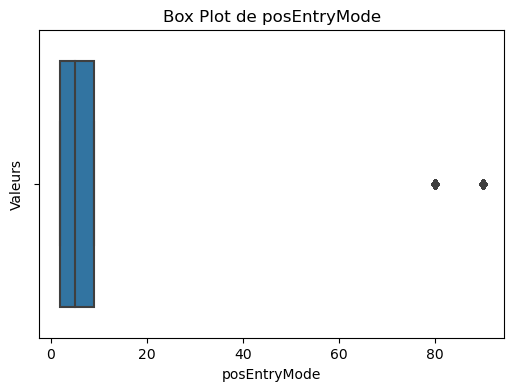

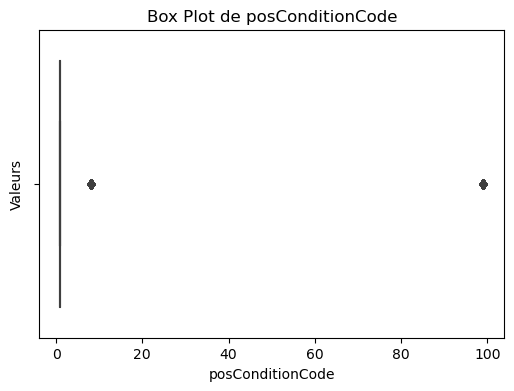

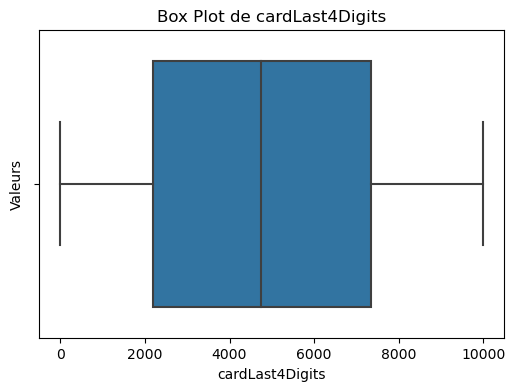

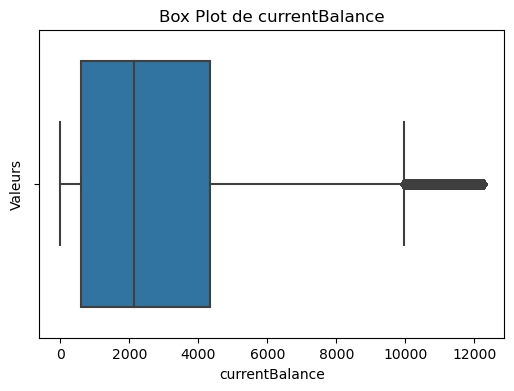

In [90]:
# Sélectionner les colonnes de types int et float
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Itérer à travers chaque colonne numérique et tracer un box plot individuel
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_columns[column])
    plt.title(f"Box Plot de {column}")
    plt.xlabel(column)
    plt.ylabel("Valeurs")
    plt.show()


In [91]:
#on veut pas toucher les outliers 
df.select_dtypes('object')

,transactionType
0,PURCHASE
1,PURCHASE
2,PURCHASE
4,PURCHASE
5,PURCHASE
...,...
786358,PURCHASE
786359,PURCHASE
786360,PURCHASE
786361,PURCHASE


In [92]:

#bools
# Convertir les colonnes booléennes en entiers dans le dataframe df
bool_columns = ['cardPresent', 'isFraud', 'checked_CVV', 'card_in_country']

df['cardPresent'] = df['cardPresent'].astype('int64')
df['isFraud'] = df['isFraud'].astype('int64')
df['checked_CVV'] = df['checked_CVV'].astype('int64')
df['card_in_country'] = df['card_in_country'].astype('int64')

# object
   
#encodage de la colonne 'type' : 
df['transactionType'] = df['transactionType'].replace(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'],[1, 2, 3])


In [93]:
df.transactionType.value_counts()

transactionType
1    731972
3     20062
2     19639
Name: count, dtype: int64

In [94]:
df['transactionType'].dtypes

dtype('int64')

In [95]:
df.dropna(inplace=True)


In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Remplacer par 'mean' si vous préférez la moyenne
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [97]:
df['isFraud'] = df['isFraud'].astype(int)


In [98]:
df.dtypes.value_counts()

int64      6
float64    5
int32      1
Name: count, dtype: int64

In [99]:
# engistrer df
df.to_csv('trans_cleaned_df.csv', index=False)